#### Importing libraries

In [214]:
import pandas as pd # for data manipulation
import glob # for reading files in a random order
import matplotlib.pyplot as plt #for plotting
import matplotlib.dates as mdates
import talipp as ta
from talipp.indicators import ADX
import talib as tb
import math as mth
import numpy as np



##### Accessing the databases

In [215]:
#Getting a CSV files list from a folder
file_path1 = './Datasets/AAPL.csv'

#Reading all CSV files in a list
appleDb = pd.read_csv(file_path1)
#print(appleDb.to_string()) - to view the original dataframe

# Convert Date column to datetime object
appleDb['Date'] = pd.to_datetime(appleDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
appleDb = appleDb[pd.to_datetime(appleDb['Date']).dt.year >= 2010]

print(appleDb.to_string())




                           Date        Open        High         Low       Close      Volume  Dividends  Stock Splits
7331  2010-01-04 05:00:00+00:00    6.487648    6.520173    6.455731    6.505279   493729600   0.000000           0.0
7332  2010-01-05 05:00:00+00:00    6.523215    6.553308    6.482179    6.516528   601904800   0.000000           0.0
7333  2010-01-06 05:00:00+00:00    6.516527    6.542364    6.406185    6.412873   552160000   0.000000           0.0
7334  2010-01-07 05:00:00+00:00    6.436582    6.444182    6.354510    6.401017   477131200   0.000000           0.0
7335  2010-01-08 05:00:00+00:00    6.392505    6.444181    6.354814    6.443573   447610800   0.000000           0.0
7336  2010-01-11 05:00:00+00:00    6.468499    6.474579    6.336272    6.386732   462229600   0.000000           0.0
7337  2010-01-12 05:00:00+00:00    6.358767    6.376398    6.274567    6.314083   594459600   0.000000           0.0
7338  2010-01-13 05:00:00+00:00    6.318642    6.411656    6.204

In [216]:
#Getting a CSV files list from a folder
file_path2 = './Datasets/AAL.csv'

#Reading all CSV files in a list
americanAirlineDb = pd.read_csv(file_path2)
#print(americanAirlineDb.to_string())

# Convert Date column to datetime object
americanAirlineDb['Date'] = pd.to_datetime(americanAirlineDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
americanAirlineDb = americanAirlineDb[pd.to_datetime(americanAirlineDb['Date']).dt.year >= 2010]

print(americanAirlineDb.to_string())

                          Date       Open       High        Low      Close     Volume  Dividends  Stock Splits
1074 2010-01-04 05:00:00+00:00   4.562868   4.657142   4.393175   4.496876    9837300        0.0           0.0
1075 2010-01-05 05:00:00+00:00   4.515733   5.062523   4.440314   5.005959   25212000        0.0           0.0
1076 2010-01-06 05:00:00+00:00   4.892829   5.071950   4.713708   4.798555   16597900        0.0           0.0
1077 2010-01-07 05:00:00+00:00   4.770271   5.119086   4.760844   4.939965   14033400        0.0           0.0
1078 2010-01-08 05:00:00+00:00   4.968248   5.119086   4.770272   4.845691   12760000        0.0           0.0
1079 2010-01-11 05:00:00+00:00   4.836264   4.930538   4.657143   4.751417   10952900        0.0           0.0
1080 2010-01-12 05:00:00+00:00   4.770273   4.855119   4.675998   4.789127    7870300        0.0           0.0
1081 2010-01-13 05:00:00+00:00   4.826836   5.185077   4.732562   5.166223   16400500        0.0           0.0
1

In [217]:
#Getting a CSV files list from a folder
file_path3 = './Datasets/APA.csv'

#Reading all CSV files in a list
apacheCorpDb = pd.read_csv(file_path3)
#print(apacheCorpDb.to_string())

# Convert Date column to datetime object
apacheCorpDb['Date'] = pd.to_datetime(apacheCorpDb['Date'], utc= True) #set the utc parameter to True to ensure that the timezone information is preserved

# Filter rows based on condition - starting from the year 2010
apacheCorpDb = apacheCorpDb[pd.to_datetime(apacheCorpDb['Date']).dt.year >= 2010]

print(apacheCorpDb.to_string())

                           Date        Open        High         Low       Close    Volume  Dividends  Stock Splits
7731  2010-01-04 05:00:00+00:00   85.830924   87.074136   85.495580   86.591576   2364900      0.000           0.0
7732  2010-01-05 05:00:00+00:00   86.681527   87.646654   86.076273   87.613937   2464500      0.000           0.0
7733  2010-01-06 05:00:00+00:00   87.335874   89.086189   86.836951   88.988045   2894500      0.000           0.0
7734  2010-01-07 05:00:00+00:00   88.595451   88.595451   86.845135   87.638504   2412200      0.000           0.0
7735  2010-01-08 05:00:00+00:00   86.787898   87.352254   85.790053   87.180489   4106000      0.000           0.0
7736  2010-01-11 05:00:00+00:00   87.883855   88.521826   86.591570   87.442192   2352600      0.000           0.0
7737  2010-01-12 05:00:00+00:00   86.199000   87.041441   85.683722   86.117210   3003100      0.000           0.0
7738  2010-01-13 05:00:00+00:00   85.487415   87.597611   85.192975   87.368599 

The dataset contains the following stock prices for 
- AAPL which stands for the Apple Inc. company. 
- AAL which stands for the American Airlines Group Inc. for Major Airlines
- APA which stands for the Apache Corporation for independent oil and gas

This dataset contains the following information:

Date: This is the date that the stock market was open (i.e. the day that the stock was traded). It's usually listed in a format like "MM/DD/YYYY" (month/day/year).

Open: This is the price at which the stock opened for trading on that particular day. It's the price that the first trade was made at.

High: This is the highest price that the stock reached during trading on that day.

Low: This is the lowest price that the stock reached during trading on that day.

Close: This is the price at which the stock closed for trading on that particular day. It's the price that the last trade was made at.

Volume: This is the total number of shares that were traded on that particular day. It's a measure of how active the market was for that stock on that day.

Dividends: These are payments that companies sometimes make to their shareholders as a way of distributing profits. They're usually paid out on a regular basis (e.g. quarterly) and are typically a percentage of the company's earnings.

Stock Splits: This is when a company decides to divide its existing shares into multiple shares. For example, if a company had 1 million shares outstanding and decided to do a 2-for-1 stock split, there would then be 2 million shares outstanding, but each share would be worth half as much as before. Companies often do stock splits to make their shares more affordable to individual investors.

#### Converting the prices into logs representation

In [218]:
#checking how all the columns are listed in the dataframe
appleDb.columns
americanAirlineDb.columns
apacheCorpDb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [219]:
#checking how all the rows are listed in the dataframe
appleDb.index
americanAirlineDb.index
apacheCorpDb.index


Int64Index([ 7731,  7732,  7733,  7734,  7735,  7736,  7737,  7738,  7739,
             7740,
            ...
            11064, 11065, 11066, 11067, 11068, 11069, 11070, 11071, 11072,
            11073],
           dtype='int64', length=3343)

In [220]:
print(appleDb.to_string())
appleDb['Open'] = appleDb['Open'].apply(lambda x: mth.log(x))
appleDb['High'] = appleDb['High'].apply(lambda x: mth.log(x))
appleDb['Low'] = appleDb['Low'].apply(lambda x: mth.log(x))
appleDb['Close'] = appleDb['Close'].apply(lambda x: mth.log(x))

                           Date        Open        High         Low       Close      Volume  Dividends  Stock Splits
7331  2010-01-04 05:00:00+00:00    6.487648    6.520173    6.455731    6.505279   493729600   0.000000           0.0
7332  2010-01-05 05:00:00+00:00    6.523215    6.553308    6.482179    6.516528   601904800   0.000000           0.0
7333  2010-01-06 05:00:00+00:00    6.516527    6.542364    6.406185    6.412873   552160000   0.000000           0.0
7334  2010-01-07 05:00:00+00:00    6.436582    6.444182    6.354510    6.401017   477131200   0.000000           0.0
7335  2010-01-08 05:00:00+00:00    6.392505    6.444181    6.354814    6.443573   447610800   0.000000           0.0
7336  2010-01-11 05:00:00+00:00    6.468499    6.474579    6.336272    6.386732   462229600   0.000000           0.0
7337  2010-01-12 05:00:00+00:00    6.358767    6.376398    6.274567    6.314083   594459600   0.000000           0.0
7338  2010-01-13 05:00:00+00:00    6.318642    6.411656    6.204

In [221]:
print("After converting with logs")


After converting with logs


In [222]:
print(appleDb.to_string())

                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits
7331  2010-01-04 05:00:00+00:00  1.869900  1.874901  1.864968  1.872614   493729600   0.000000           0.0
7332  2010-01-05 05:00:00+00:00  1.875367  1.879970  1.869057  1.874342   601904800   0.000000           0.0
7333  2010-01-06 05:00:00+00:00  1.874342  1.878299  1.857264  1.858307   552160000   0.000000           0.0
7334  2010-01-07 05:00:00+00:00  1.861998  1.863178  1.849165  1.856457   477131200   0.000000           0.0
7335  2010-01-08 05:00:00+00:00  1.855126  1.863178  1.849213  1.863083   447610800   0.000000           0.0
7336  2010-01-11 05:00:00+00:00  1.866944  1.867884  1.846291  1.854223   462229600   0.000000           0.0
7337  2010-01-12 05:00:00+00:00  1.849834  1.852603  1.836505  1.842783   594459600   0.000000           0.0
7338  2010-01-13 05:00:00+00:00  1.843504  1.858118  1.825201  1.856789   605892000   0.000000           0.0
7339  2010-01-14 05

#### Graphs Representations

Open Graphs - The opening price of the stock on that day. This helps to identify trends in the stock's price and evaluate whether the stock is undervalued or overvalued.

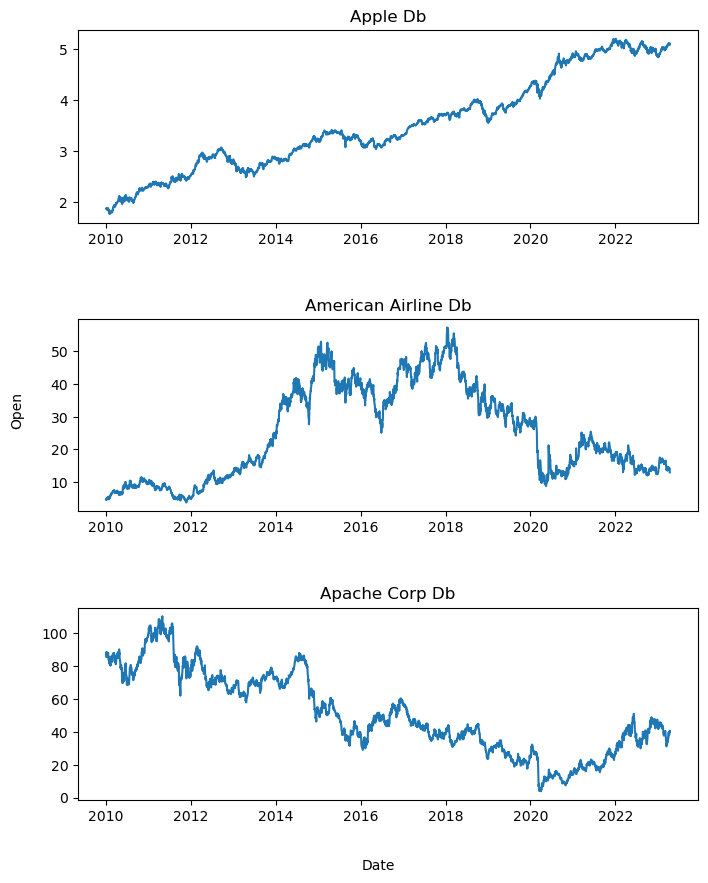

In [223]:
#plotting the closing price of the stocks

# create a figure and axis objects with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot the open prices for each company on each axis object
axs[0].plot(appleDb['Date'], appleDb['Open'])
axs[0].set_title('Apple Db')
axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Open'])
axs[1].set_title('American Airline Db')
axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Open'])
axs[2].set_title('Apache Corp Db')

# adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# add a common x-label and y-label to the collage
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Open', va='center', rotation='vertical')

# display the plot
plt.show()

High Graphs - The highest price the stock reached during the day. This helps to identify how volatile the stock is and how much potential upside there is.

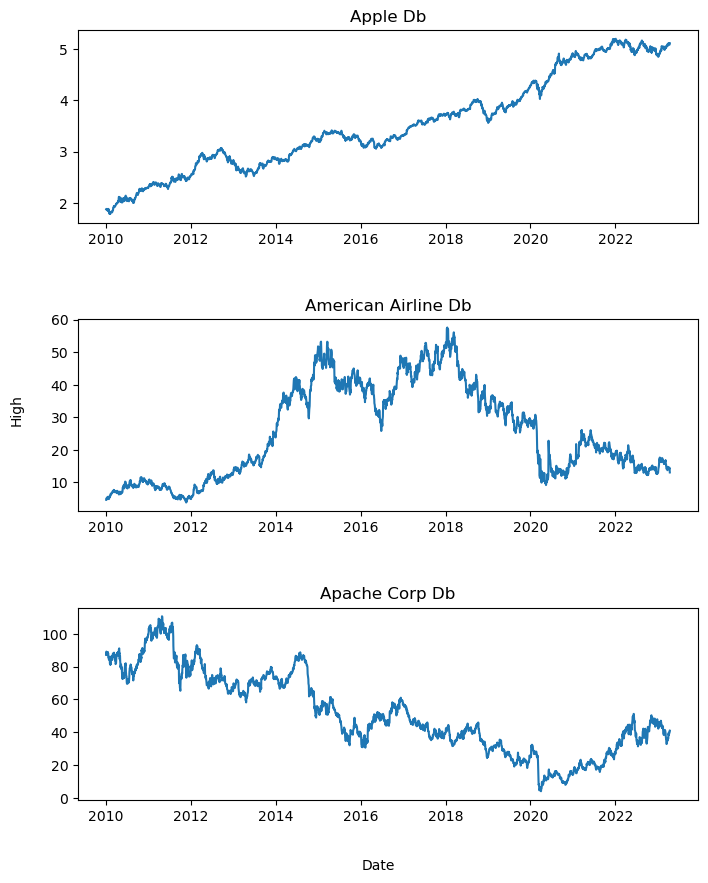

In [224]:
#plotting the closing price of the stocks

# create a figure and axis objects with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot the high prices for each company on each axis object
axs[0].plot(appleDb['Date'], appleDb['High'])
axs[0].set_title('Apple Db')
axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['High'])
axs[1].set_title('American Airline Db')
axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['High'])
axs[2].set_title('Apache Corp Db')

# adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# add a common x-label and y-label to the collage
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'High', va='center', rotation='vertical')

# display the plot
plt.show()

Low Graphs -  The lowest price the stock reached during the day. This helps you evaluate how risky the stock is and how much potential downside there is.

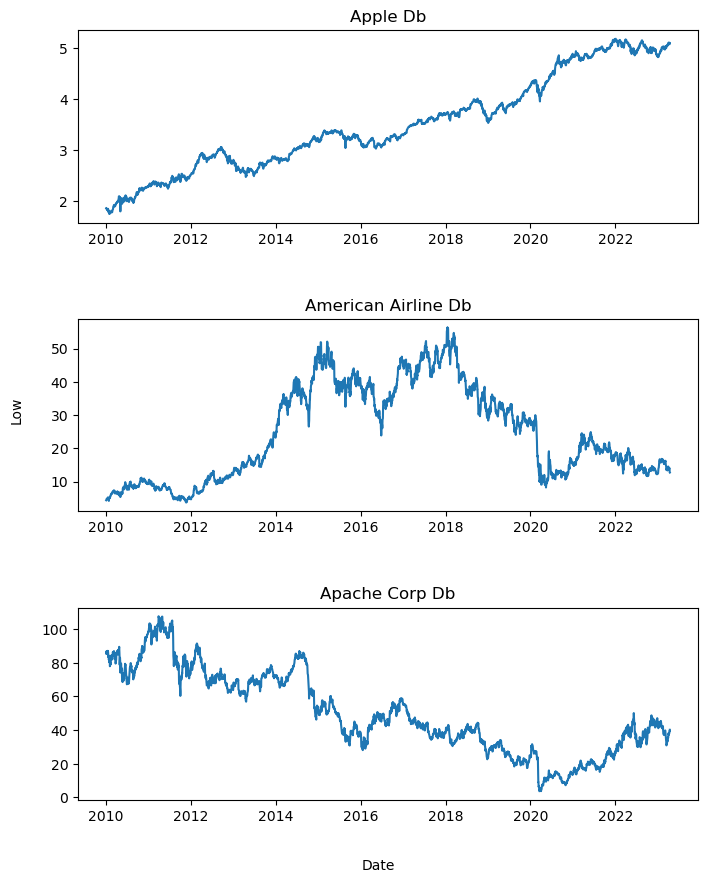

In [225]:
#plotting the closing price of the stocks

# create a figure and axis objects with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot the low prices for each company on each axis object
axs[0].plot(appleDb['Date'], appleDb['Low'])
axs[0].set_title('Apple Db')
axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Low'])
axs[1].set_title('American Airline Db')
axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Low'])
axs[2].set_title('Apache Corp Db')

# adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# add a common x-label and y-label to the collage
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Low', va='center', rotation='vertical')

# display the plot
plt.show()

Closing Graphs - The closing price of the stock on that day. This can helps to evaluate how the stock performed over the course of the day and whether it ended up in positive or negative territory.

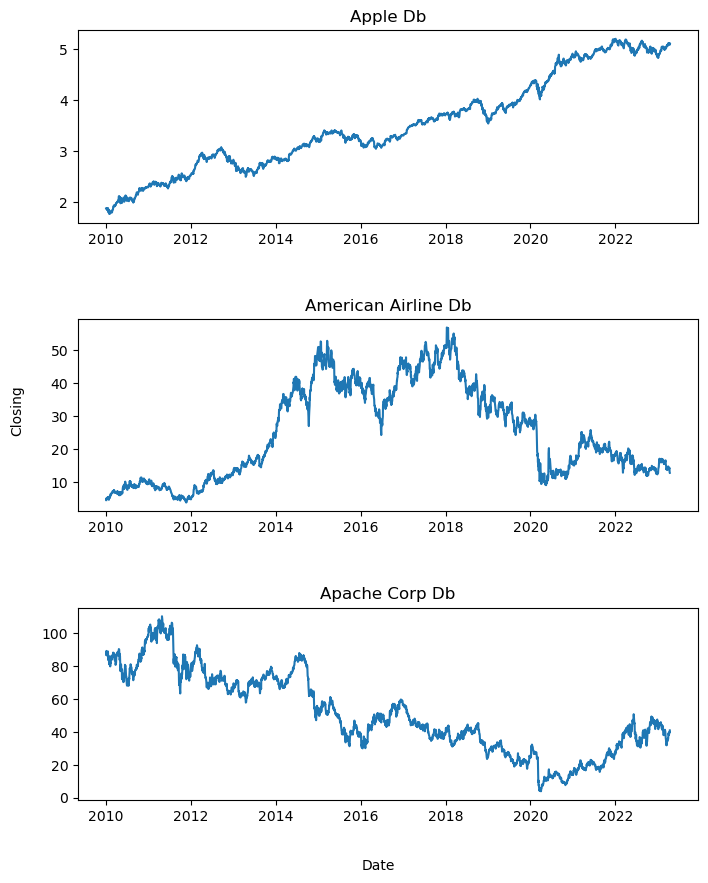

In [226]:
#plotting the closing price of the stocks

# create a figure and axis objects with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot the close prices for each company on each axis object
axs[0].plot(appleDb['Date'], appleDb['Close'])
axs[0].set_title('Apple Db')
axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Close'])
axs[1].set_title('American Airline Db')
axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Close'])
axs[2].set_title('Apache Corp Db')

# adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# add a common x-label and y-label to the collage
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Closing', va='center', rotation='vertical')

# display the plot
plt.show()

Volume Graphs - The total number of shares of the stock that were traded on that day. This helps to evaluate how active the market is for the stock and how much interest there is from other investors.

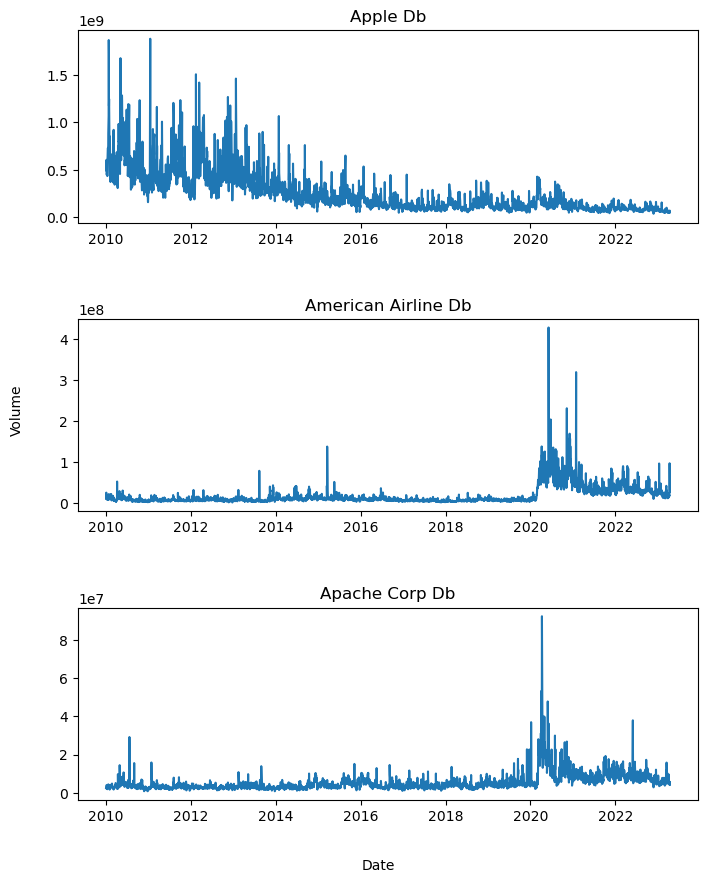

In [227]:
#plotting the closing price of the stocks

# create a figure and axis objects with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot the close prices for each company on each axis object
axs[0].plot(appleDb['Date'], appleDb['Volume'])
axs[0].set_title('Apple Db')
axs[1].plot(americanAirlineDb['Date'], americanAirlineDb['Volume'])
axs[1].set_title('American Airline Db')
axs[2].plot(apacheCorpDb['Date'], apacheCorpDb['Volume'])
axs[2].set_title('Apache Corp Db')

# adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# add a common x-label and y-label to the collage
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Volume', va='center', rotation='vertical')

# display the plot
plt.show()

#### Adding extra features into the dataframe to help the AI stock advisor to make better predictions. 

In [228]:
appleDb['Price Change'] = appleDb['Close'] - appleDb['Close'].shift(1) #taking the closing price of the current day and subtracting it from the closing price of the previous day


By adding the Price Change in the data frame it will illustrate the percentage change between the previous closing price (of the previous day) and closing price of that day for each day. This can provide insight into the daily market sentiment of the stock. The reason for this is that the difference between the previous closing price and the closing price for a given day provides a good indication of the direction and magnitude of price movements for that day.

In [229]:
appleDb['Price Volatility'] = appleDb['High'] - appleDb['Low']


By adding the Price Volatility to the dataframe it refers to how much the price of a stock moves up and down over a certain period. The more a stock's price fluctuates (changes frequently), the higher its volatility. 

Note that the Volatility means the amount of uncertainty or risk related to the size of changes in a security's value

Volatility can be caused by various factors, such as changes in market conditions, news events, or investor sentiment. High volatility can indicate that the stock is more risky or uncertain, while low volatility can suggest that the stock is more stable and predictable. 

To work out the volatility of a stock taking the difference between the high and low prices of a stock. As stated before, the higher the difference, the more volatility. 

In [230]:
#calculating the SMA for the closing price of the stocks
appleDb['SMA'] = tb.SMA(appleDb['Close'], 10)

In [231]:
# calculate the TEMA with a 10-day period
# first_ema = appleDb['Close'].ewm(span=10, adjust=False).mean()
# second_ema = first_ema.ewm(span=10, adjust=False).mean()
# third_ema = second_ema.ewm(span=10, adjust=False).mean()
# appleDb['TEMA'] = (3 * first_ema) - (3 * second_ema) + third_ema
# print(appleDb.to_string())
appleDb['TEMA'] = tb.TEMA(appleDb['Close'], 10)


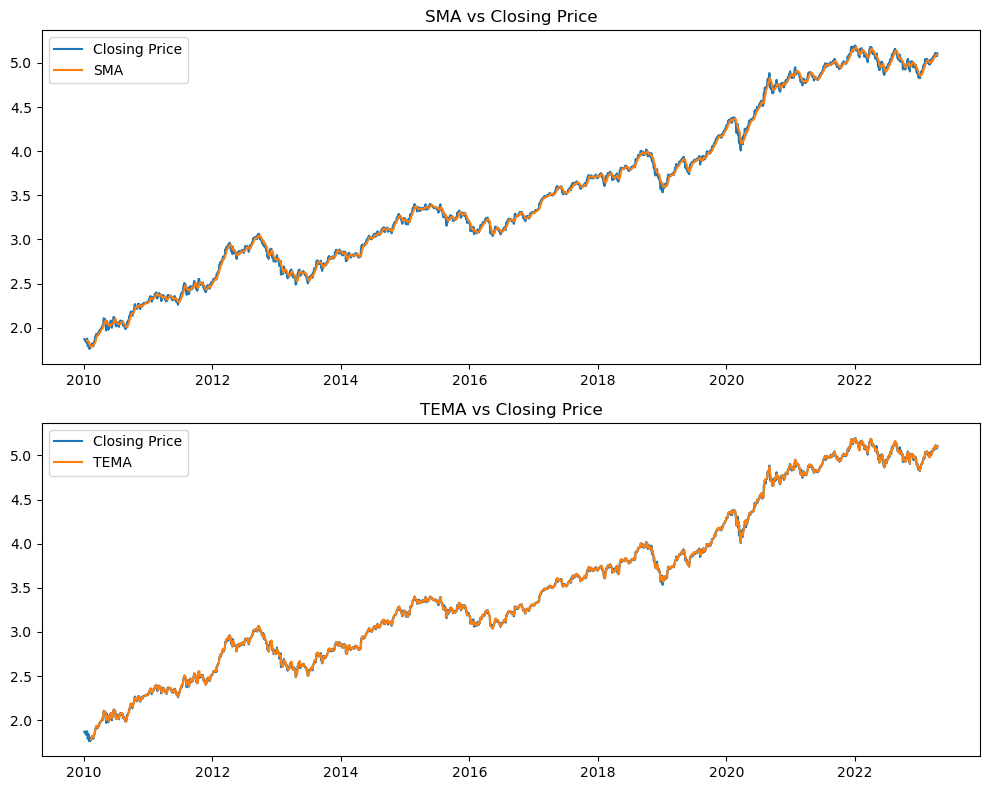

In [232]:
# Plot SMA vs Closing Price
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
ax1.plot(appleDb['Date'],appleDb['SMA'], label='SMA')
ax1.set_title('SMA vs Closing Price')
ax1.legend()

# Plot TEMA vs Closing Price
ax2.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
ax2.plot(appleDb['Date'],appleDb['TEMA'], label='TEMA')
ax2.set_title('TEMA vs Closing Price')
ax2.legend()

plt.tight_layout()
plt.show()

Moving Averages: 


Moving averages are a trend-following indicator that smooths out price fluctuations over a given period of time. They can be used to identify trends and potential reversal points in the stock's price.

The Simple Moving Average (SMA) is useful as it is a way to calculate the average price of a stock over a specific period of time. For example, if you want to calculate the SMA over the last 10 days, you would add up the prices of the stock from each of the last 10 days and divide that sum by 10.

The SMA is called "moving" because as each new day's price is added to the calculation, the oldest price is dropped, and the SMA "moves" to reflect the new set of prices.

The SMA can help to smooth out the daily fluctuations in the stock price and give you a better idea of the overall trend. If the SMA is moving up, it means that the stock price is generally increasing, and if the SMA is moving down, it means that the stock price is generally decreasing.

the simple moving average (SMA) is a calculation that helps to identify trends in the price of a stock over a specific time period. It is calculated by adding up the prices over a certain number of days, and then dividing by the number of days.

For example, if you want to calculate the 20-day SMA, you would add up the closing prices for the past 20 days and then divide by 20.

 The closing price is used because it is the final price of a trading day and is considered to be the most important price point for that day. Using closing prices over a period of time helps to reduce the impact of short-term price fluctuations and provides a more accurate picture of the trend over that time period.

The TEMA moving average is a technical analysis indicator that uses a triple exponential moving average to reduce the lag of the standard exponential moving average (EMA).

To calculate the TEMA, you first calculate a single EMA for a given period, then you calculate a second EMA of that first EMA, and then a third EMA of that second EMA. The formula for the TEMA is:

TEMA = 3 * (EMA1 - EMA2) + EMA3

where EMA1 is the first EMA, EMA2 is the second EMA of the first EMA, and EMA3 is the third EMA of the second EMA.

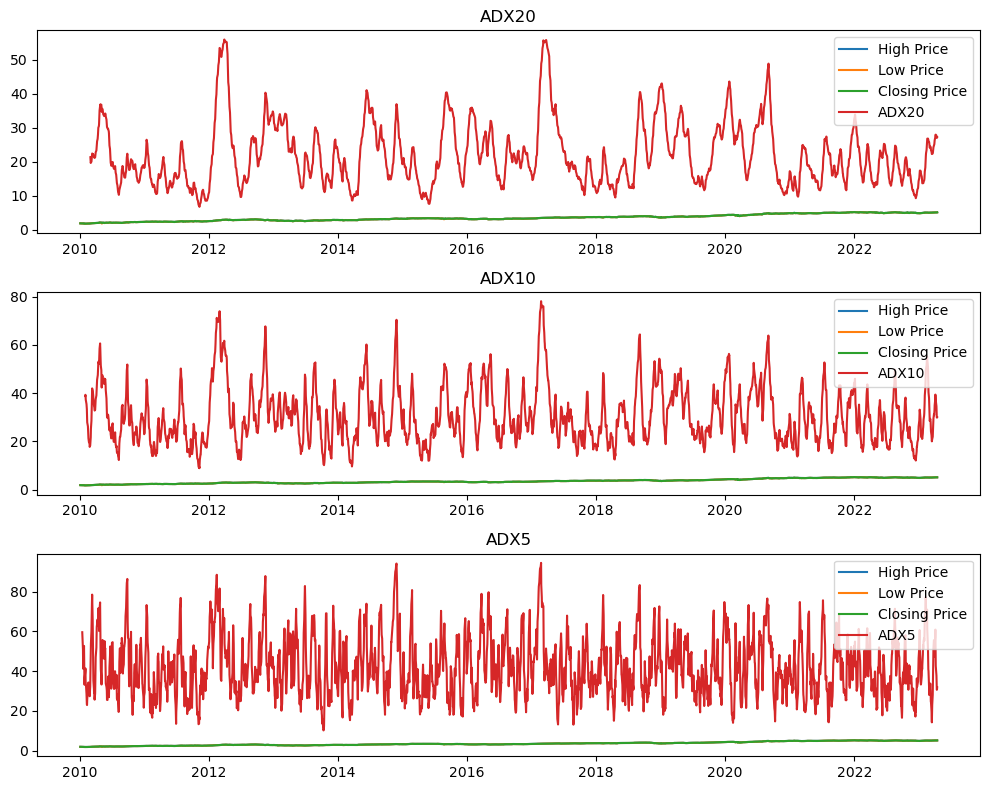

In [233]:
appleDb['ADX20'] = tb.ADX(appleDb['High'],appleDb['Low'], appleDb['Close'], timeperiod=20)
appleDb['ADX10'] = tb.ADX(appleDb['High'],appleDb['Low'], appleDb['Close'], timeperiod=10)
appleDb['ADX5'] = tb.ADX(appleDb['High'],appleDb['Low'], appleDb['Close'], timeperiod=5)


# Plot Various ADX values
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10,8))
ax1.plot(appleDb['Date'],appleDb['High'], label='High Price')
ax1.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
ax1.plot(appleDb['Date'],appleDb['ADX20'], label='ADX20')
ax1.set_title('ADX20')
ax1.legend()

ax2.plot(appleDb['Date'],appleDb['High'], label='High Price')
ax2.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
ax2.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
ax2.plot(appleDb['Date'],appleDb['ADX10'], label='ADX10')
ax2.set_title('ADX10')
ax2.legend()

ax3.plot(appleDb['Date'],appleDb['High'], label='High Price')
ax3.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
ax3.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
ax3.plot(appleDb['Date'],appleDb['ADX5'], label='ADX5')
ax3.set_title('ADX5')
ax3.legend()

plt.tight_layout()
plt.show()

Average Directional Movement Index(Momentum Indicator)

ADX can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values. The Average Directional Movement Index (ADX) is a technical indicator that is based on the high, low, and close prices of a stock. The ADX helps to measure the strength of a trend, whether it's up or down, and its overall momentum.

The ADX is calculated using a formula that takes into account the price movements over a specific period of time. The indicator is based on the difference between the high and low prices and the current closing price. The ADX is usually plotted on a chart as a line that ranges between 0 and 100, with a higher value indicating a stronger trend.

To calculate the ADX for a stock, you would first need to determine the time period for which you want to calculate the indicator. This can vary depending on your strategy and the volatility of the stock you are analyzing. Once you have determined the time period, you can then use the high, low, and close prices for that period to calculate the ADX.

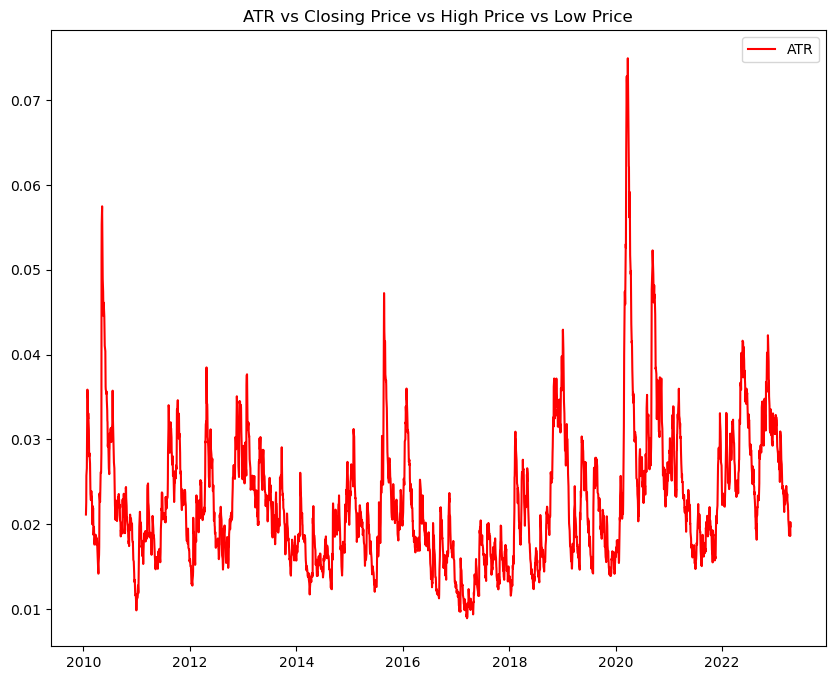

In [234]:
appleDb['ATR'] = tb.ATR(appleDb['High'], appleDb['Low'], appleDb['Close'], timeperiod=10)
fig, (ax1) = plt.subplots(1, 1, figsize=(10,8))
# ax1.plot(appleDb['Date'],appleDb['Close'], label='Closing Price')
# ax1.plot(appleDb['Date'],appleDb['High'], label='High Price')
# ax1.plot(appleDb['Date'],appleDb['Low'], label='Low Price')
ax1.plot(appleDb['Date'],appleDb['ATR'], label='ATR',color='red')
ax1.set_title('ATR vs Closing Price vs High Price vs Low Price')
ax1.legend()


Average True Range (ATR): ATR is a measure of volatility that takes into account the daily price range of the stock. It can help predict potential price movement and can be useful for setting stop-loss orders.

The Average True Range (ATR) is another technical indicator that is commonly used by traders and investors to measure the volatility of a stock. While the ADX measures the strength of a trend, the ATR measures the volatility of the stock price.

The ATR is calculated using the difference between the high and low prices of a stock over a specific period of time. It takes into account any gaps or limit moves that may have occurred during that time period. The ATR is usually expressed in points or as a percentage of the stock price.

One key difference between the ADX and ATR is that the ADX is used to measure the strength of a trend, while the ATR is used to measure the volatility of the stock price. Another difference is that the ADX is calculated using the high, low, and close prices, while the ATR is calculated using only the high and low prices.

Both the ADX and ATR are useful indicators that can help traders and investors make informed decisions about buying and selling stocks. The ADX can help to identify strong trends, while the ATR can help to identify potential changes in volatility.

Text(0.5, 1.0, 'Apple RSI')

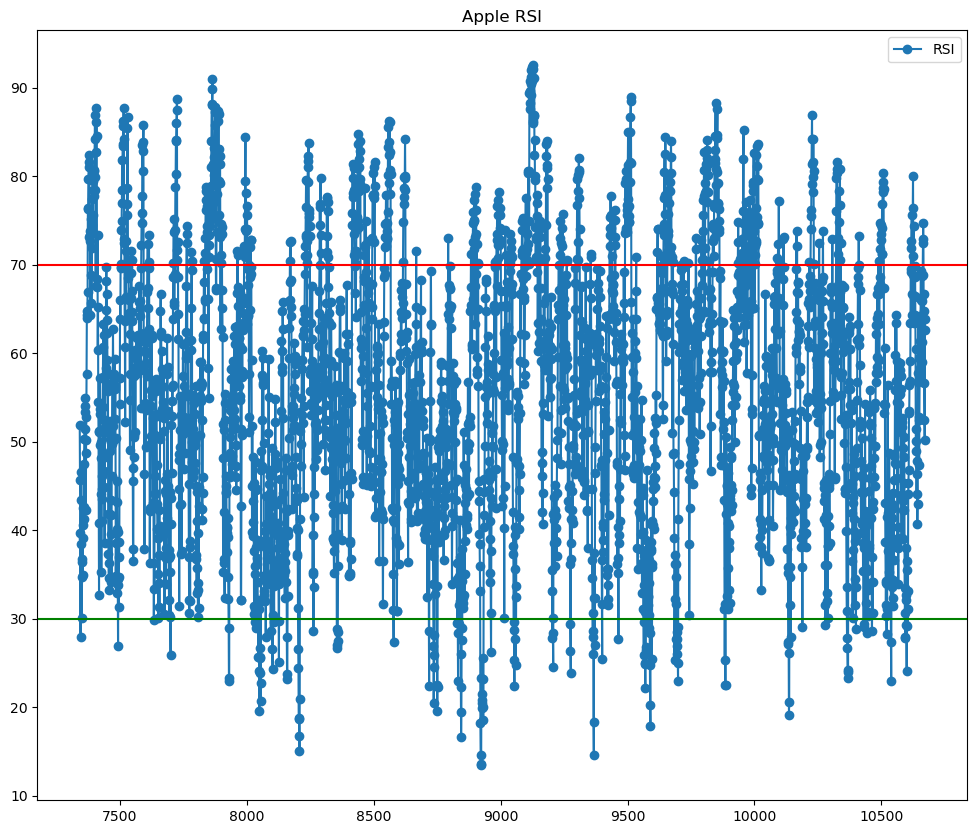

In [235]:
appleDb['RSI'] = tb.RSI(appleDb['Close'], timeperiod=10)
appleDb[['RSI']].plot(figsize=(12,10),marker='o')
plt.axhline(y=30, color='green', linestyle='-')
plt.axhline(y=70, color='red', linestyle='-')
x = np.arange(0, len(appleDb['RSI']),0.1)
appleDb['RSI'].tail(10)
plt.title("Apple RSI")

Relative Strength Index (RSI): an indicator used in finance to help investors and traders understand whether a stock is overbought or oversold. It is a measure of the stock's recent price changes, and is expressed as a number between 0 and 100.

The RSI works by comparing the average price gains of a stock to its average price losses over a specific time period (usually 14 days). If the average gains are higher than the average losses, the RSI will be higher, indicating that the stock is in an uptrend. If the average losses are higher than the average gains, the RSI will be lower, indicating that the stock is in a downtrend.

Traders use the RSI to identify potential buy and sell signals. When the RSI is above 70, it is considered overbought, which means that the stock may be due for a price correction. When the RSI is below 30, it is considered oversold, which means that the stock may be undervalued and due for a price increase.

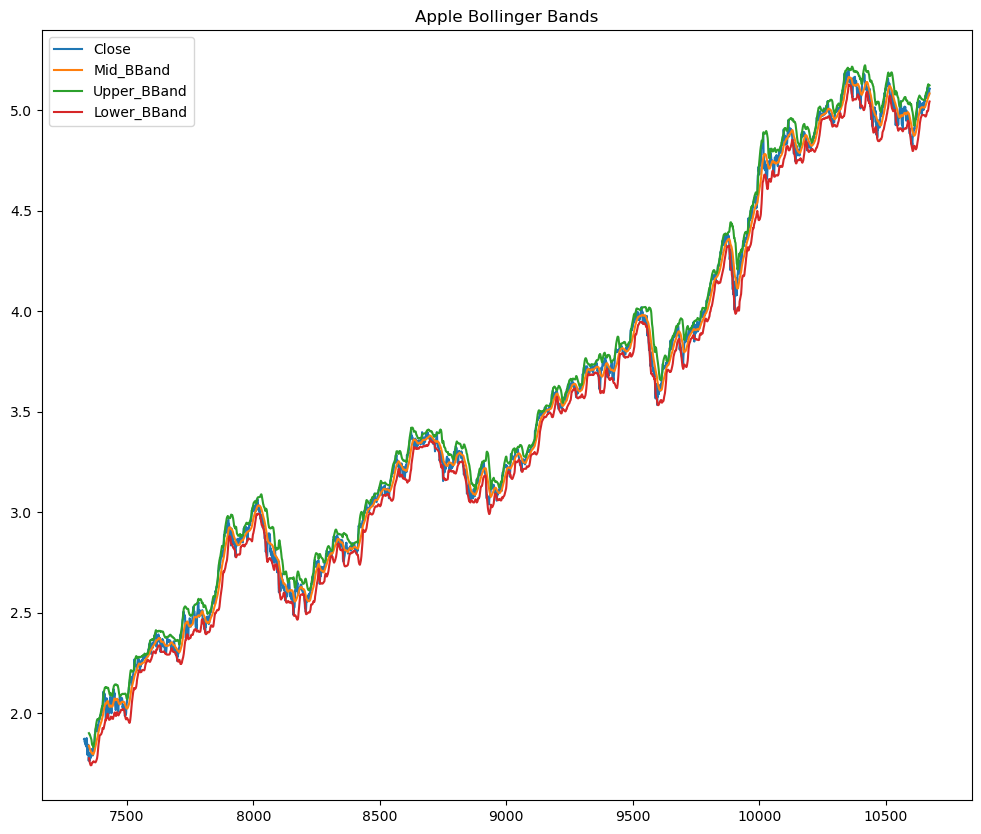

In [236]:
appleDb['Upper_BBand'], appleDb['Mid_BBand'], appleDb['Lower_BBand'] = tb.BBANDS(appleDb['Close'], timeperiod =20)
appleDb[['Close','Mid_BBand','Upper_BBand','Lower_BBand']].plot(figsize= (12,10))
plt.title("Apple Bollinger Bands")
plt.show()

Bollinger Bands is a tool that helps traders understand how much a stock's price tends to change over time. It consists of three lines on a chart: a middle line that represents the average price of the stock over a certain period (usually 20 days), and two additional lines that are drawn above and below the middle line.

These upper and lower lines are drawn at a distance that represents how much the stock's price has varied in the past. The distance is based on the stock's standard deviation, which is a measure of how much its price has fluctuated in the past.

When the stock's price is moving within the Bollinger Bands, it is considered to be trading within a normal range. However, when the stock's price moves above the upper line, it is considered to be overbought, meaning it may be due for a price correction. Conversely, when the stock's price moves below the lower line, it is considered to be oversold, meaning it may be due for a price increase.

Bollinger Bands can be a useful tool for traders to help identify potential buy and sell signals. 

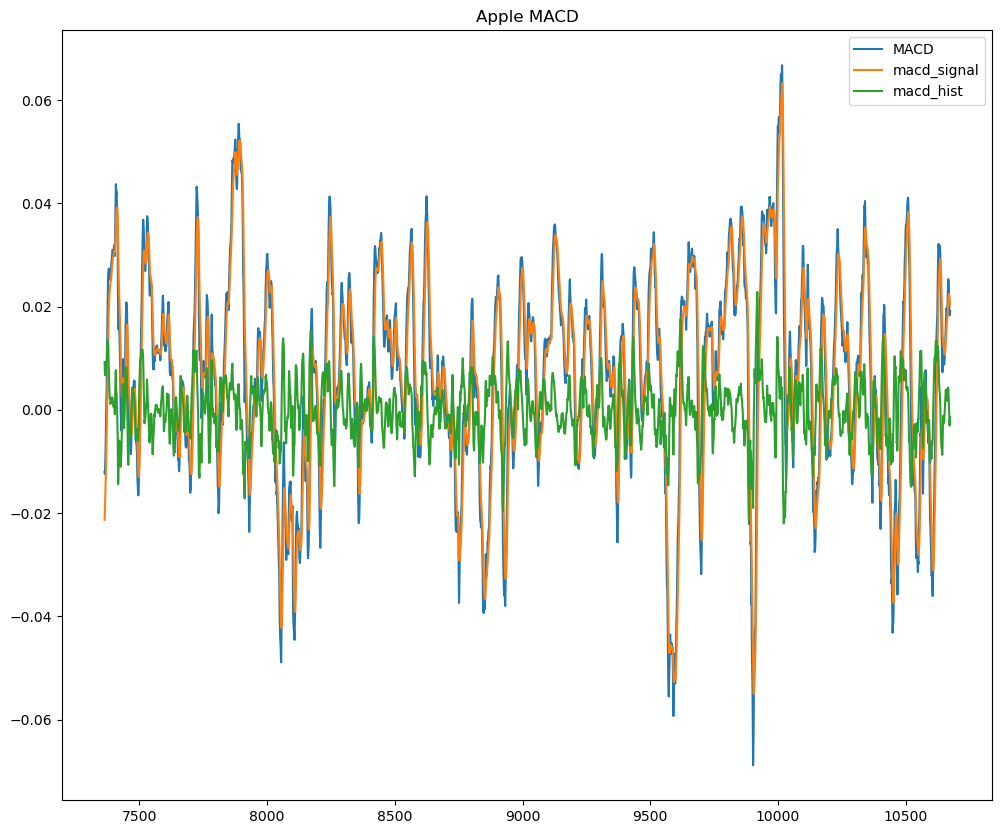

In [237]:
# Calculate the MACD and Signal Line indicators
appleDb["MACD"], appleDb["macd_signal"], appleDb["macd_hist"] = tb.MACD(appleDb["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
appleDb[['MACD','macd_signal','macd_hist']].plot(figsize= (12,10))
plt.title("Apple MACD")
plt.show()


Moving Average Convergence Divergence (MACD): The MACD is a trend-following indicator that calculates the difference between two moving averages of the stock's price. It can help identify changes in the stock's trend and can be used to generate buy or sell signals.

The MACD is a trend-following indicator that measures the difference between a short-term moving average and a long-term moving average. It is typically used with a 12-day and 26-day moving average, and a 9-day signal line.


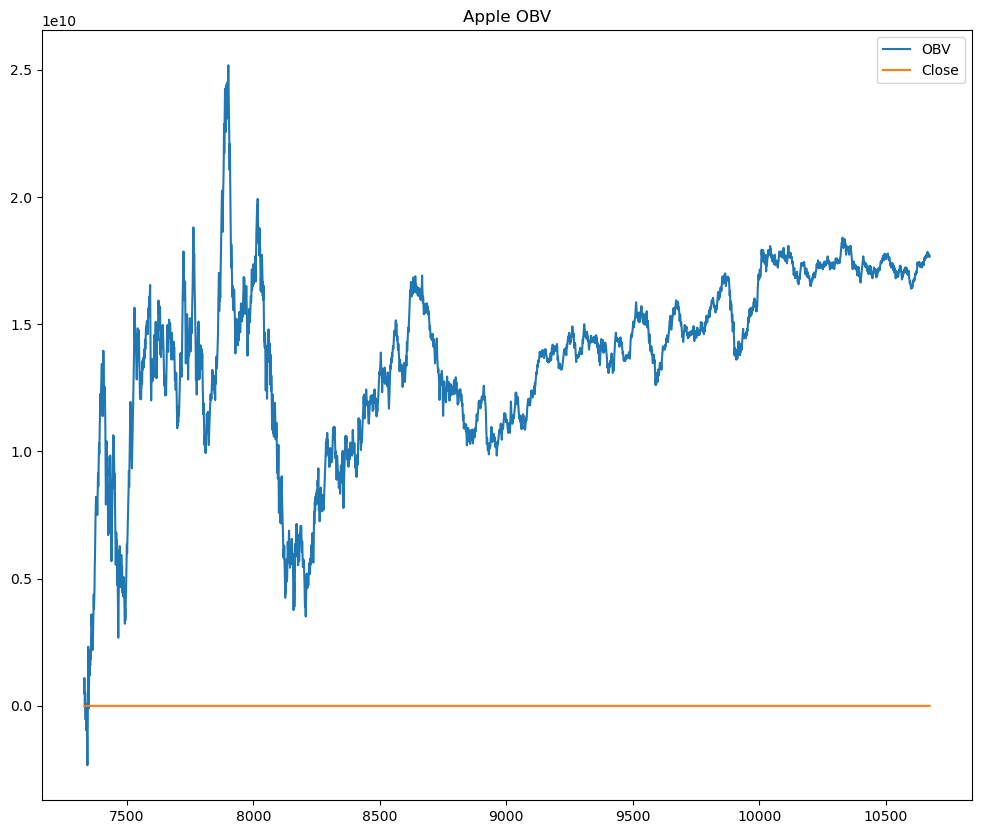

                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits  Price Change  Price Volatility       SMA      TEMA      ADX20      ADX10       ADX5       ATR        RSI  Upper_BBand  Mid_BBand  Lower_BBand      MACD  macd_signal  macd_hist           OBV
7331  2010-01-04 05:00:00+00:00  1.869900  1.874901  1.864968  1.872614   493729600   0.000000           0.0           NaN          0.009933       NaN       NaN        NaN        NaN        NaN       NaN        NaN          NaN        NaN          NaN       NaN          NaN        NaN  4.937296e+08
7332  2010-01-05 05:00:00+00:00  1.875367  1.879970  1.869057  1.874342   601904800   0.000000           0.0      0.001728          0.010913       NaN       NaN        NaN        NaN        NaN       NaN        NaN          NaN        NaN          NaN       NaN          NaN        NaN  1.095634e+09
7333  2010-01-06 05:00:00+00:00  1.874342  1.878299  1.857264  1.858307   552160000   0.000000      

In [238]:
# Calculate the On Balance Volume indicator
appleDb['OBV'] = tb.OBV(appleDb['Close'], appleDb['Volume'])
appleDb[['OBV','Close']].plot(figsize= (12,10))
plt.title("Apple OBV")
plt.show()
print(appleDb.to_string())

On Balance Volume (OBV)

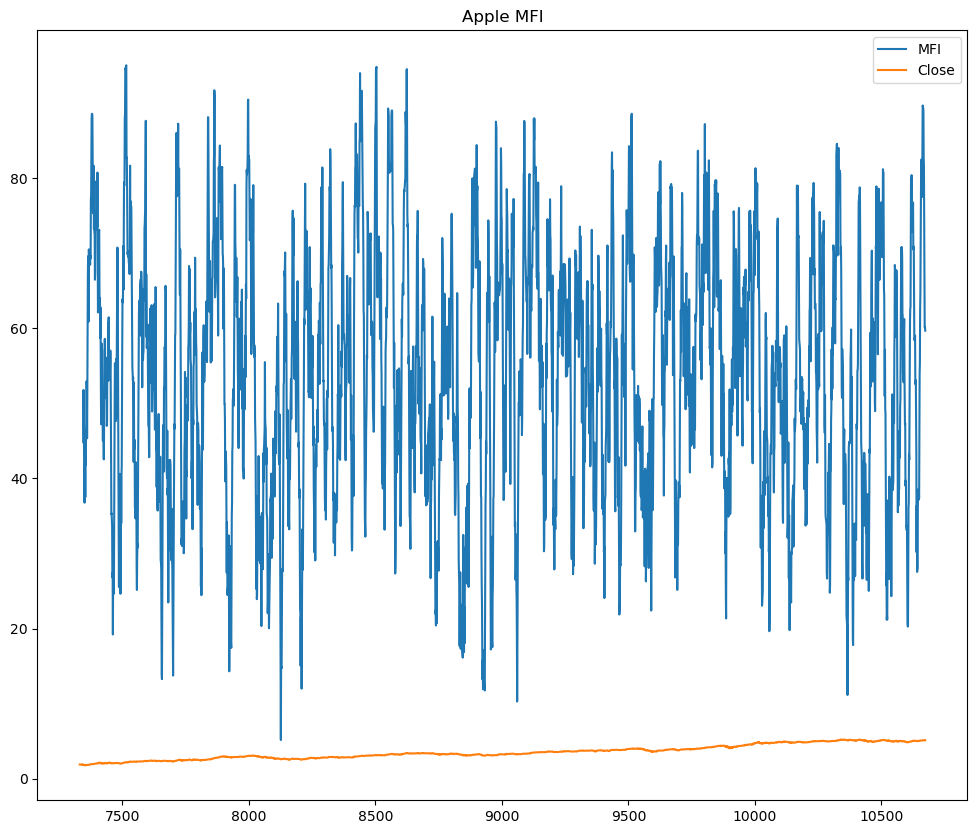

                           Date      Open      High       Low     Close      Volume  Dividends  Stock Splits  Price Change  Price Volatility       SMA      TEMA      ADX20      ADX10       ADX5       ATR        RSI  Upper_BBand  Mid_BBand  Lower_BBand      MACD  macd_signal  macd_hist           OBV        MFI
7331  2010-01-04 05:00:00+00:00  1.869900  1.874901  1.864968  1.872614   493729600   0.000000           0.0           NaN          0.009933       NaN       NaN        NaN        NaN        NaN       NaN        NaN          NaN        NaN          NaN       NaN          NaN        NaN  4.937296e+08        NaN
7332  2010-01-05 05:00:00+00:00  1.875367  1.879970  1.869057  1.874342   601904800   0.000000           0.0      0.001728          0.010913       NaN       NaN        NaN        NaN        NaN       NaN        NaN          NaN        NaN          NaN       NaN          NaN        NaN  1.095634e+09        NaN
7333  2010-01-06 05:00:00+00:00  1.874342  1.878299  1.857264  1.85

In [239]:
# Calculate the Chaikin Money Flow indicator
appleDb['MFI'] = tb.MFI(appleDb['High'], appleDb['Low'], appleDb['Close'], appleDb['Volume'])
appleDb[['MFI','Close']].plot(figsize= (12,10))
plt.title("Apple MFI")
plt.show()
print(appleDb.to_string())

Money Flow Index (MFI)